# Dataset about breast cancer
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

link for more information: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [3]:
features_cancer = pd.read_csv('entradas_breast.csv')
classes_cancer = pd.read_csv('saidas_breast.csv')

In [4]:
# in order to split in train and test
from sklearn.model_selection import train_test_split

In [5]:
features_train, features_test, classes_train, classes_test = train_test_split(features_cancer, classes_cancer, test_size=0.25, random_state=0)

In [7]:
features_cancer.shape

(569, 30)

In [9]:
classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu',
                     kernel_initializer='random_uniform',
                     input_dim= 30))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['binary_accuracy'])
classifier.fit(features_train,
               classes_train,
               batch_size = 10,
               epochs = 100)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5877 - loss: 10.3117
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6911 - loss: 1.6641
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7949 - loss: 0.5986
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8470 - loss: 0.3977
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8753 - loss: 0.3348
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7871 - loss: 0.5211
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7941 - loss: 0.6702
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8572 - loss: 0.3567
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8936 - loss: 0.3075
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8924 - loss: 0.2436
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9038 - loss: 0.26

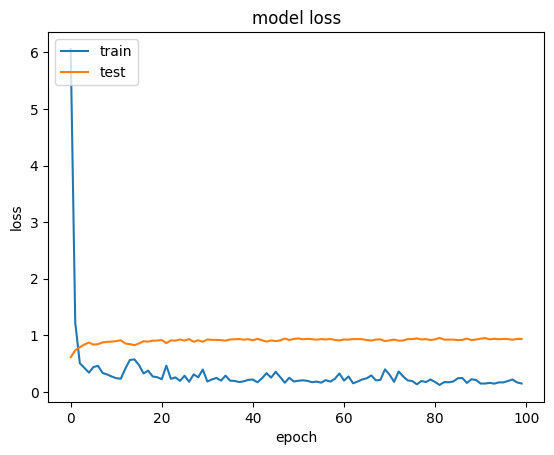

In [12]:
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['binary_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [26]:
predic_test = classifier.predict(features_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [39]:
# prompt: mostrar os primeiros 20 registro predict_test, com round do float 3 casas

for i in range(20):
  print(str(round(predic_test[i][0], 3)), '-->',predic_test[i][0]>0.5)

0.067 --> False
0.999 --> True
0.999 --> True
0.755 --> True
1.0 --> True
0.999 --> True
1.0 --> True
0.999 --> True
1.0 --> True
0.965 --> True
0.971 --> True
0.905 --> True
1.0 --> True
0.438 --> False
0.975 --> True
0.001 --> False
1.0 --> True
0.0 --> False
0.894 --> True
0.0 --> False


In [45]:
features_test['result'] = predic_test>0.5

In [46]:
features_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,False
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,139.00000,0.06005,0.2444,0.06788,True
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,True
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,True
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,23.21,26.97,153.50,1670.0,0.09509,0.16820,195.00000,0.12370,0.1909,0.06309,...,34.51,206.00,2944.0,0.14810,0.41260,582.00000,0.25930,0.3103,0.08677,False
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026,True
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.12920,0.20740,0.17910,107.00000,311.0000,0.07592,True
76,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641,...,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,271.0000,0.07191,True


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
precision = accuracy_score(classes_test, features_test['result'])
matrix = confusion_matrix(classes_test, features_test['result'])

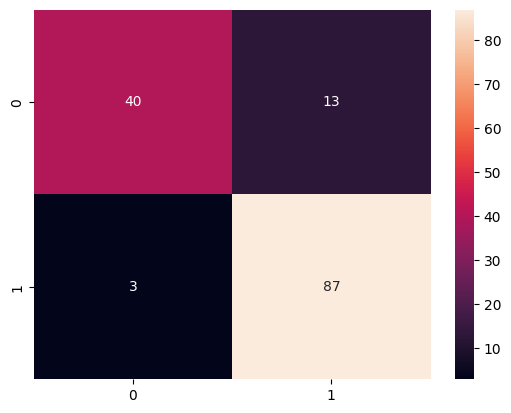

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix, annot=True)
plt.show()


In [52]:
features_test.drop('result', axis=1, inplace=True)
result = classifier.evaluate(features_test, classes_test)
result

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.8798 - loss: 0.7810 


[0.7080032229423523, 0.8881118893623352]